# Modules

In [ ]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.7.0'

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Load dataset

In [ ]:
def load_dataset(folder_path, test_size=0.1):
  folders = ['train', 'test']
  sub_folders = ['pos', 'neg']

  X, Y = list(), list()
  
  for folder in folders:
    for sub_folder in sub_folders:
      path = os.path.join(folder_path, f"{folder}/{sub_folder}")
      files = os.listdir(path)
      print(f'Reading {len(files)} files in: {path}')
      for file_name in files:
        with open(os.path.join(path, file_name), 'r', encoding='utf-8') as f:
          text = f.read()
          
          # if folder == 'train':
          X.append(text)
          if sub_folder == 'pos':
            Y.append(1)
          else:
            Y.append(0)
          # else:
          #   X_test.append(text)
          #   if sub_folder == 'pos':
          #     Y_test.append(1)
          #   else:
          #     Y_test.append(0)
          
  X, Y = np.array(X), np.array(Y)
  X, X_test, Y, Y_test = train_test_split(X, Y, test_size=test_size, shuffle=True)
  
  return X, Y, X_test, Y_test

In [ ]:
path = "/content/aclImdb/"
X, Y, X_test, Y_test = load_dataset(folder_path=path, test_size=0.1)

Reading 12500 files in: /content/aclImdb/train/pos
Reading 12500 files in: /content/aclImdb/train/neg
Reading 12500 files in: /content/aclImdb/test/pos
Reading 12500 files in: /content/aclImdb/test/neg


In [ ]:
print(X.shape, Y.shape, X_test.shape, Y_test.shape)
print(Y[0], X[0])
print(Y_test[0], X_test[0])

(45000,) (45000,) (5000,) (5000,)
0 After reading the reviews I decided to rent the DVD version. <br /><br />I like classical music and wanted to learn more about Bach. <br /><br />I was disappointed. I guess I do not know enough about Bach music and the the comments were not enough for me to understand the importance or what music was being played. <br /><br />Maybe it would be appropriate with the guidance of an expert in Bach's music that can explain the film. <br /><br />I really tried and saw the whole film hopping that I would be able to enjoy at least some of it, but I did not. <br /><br />See it at your own risk.
1 I can remember seeing this movie when I was very young and several times on TV since then. I have always liked it. I have noticed on the print shown on local TV that one scene has reversed film. It is the one where they are hiding behind the rock outcrop(it looks like Vasquez Rocks near Los Angeles) watching the Indians ride by. If you look carefully, you will notice

`Glove Word Embeddings` do not contain representation for abbreviations like `I've`, one of the preprocessing steps was to unpack those abbreviations. Similarly, the corpus had to contain only English alphabet characters. Lastly, extra whitespaces were truncated. Also, punctuation is removed; using the Keras tokenizer, so we don't need to do it here.

In [ ]:
def preprocess_data(reviews):

  rep = {
    # ".": " . ", 
    # ",": " , ", 
    # "(": " ( ", 
    # ")": " ) ", 
    # "[": " [ ", 
    # "]": " ] ",
    # "\"": " \" ", 
    "<br />": " ", 
    "'ve": " have", 
    "'d": " would", 
    "don't": "do not", 
    "doesn't": "does not", 
    "did't": "did not", 
    "won't": "will not", 
    "can't": "cannot", 
    "should't": "should not", 
    "would't": "would not", 
    "isn't": "is not",
    "haven't": "have not",
    "hasn't": "has not",
    "hadn't": "had not",
    "weren't": "were not",
    "wasn't": "was not", 
    "'ll": " will", 
    "'re": " are", 
    "it's": "it is",
    "It's": "it is", 
    "it´s": "it is",
    "he's": "he is", 
    "he’s": "he is",
    "she's": "she is", 
    "here's": "here is", 
    "i'm": "i am", 
    "they've": "they have", 
    "we've": "we have", 
    "That's": "that is", 
    "what's": "what is", 
    "what're": "what are", 
    "who's": "who is", 
    "that's": "that is", 
    "let\'s": "let us", 
    "c'mon": "come on", 
    # "-": " - ",
    # "+": " + ",
    # "&": " & ", 
    # "$": " $ ",
    # "%": " % ",
    # "*": " * ",
    # "/": " / ",
    # "\\": " \\ ",
    # "?": " ? ", 
    # "!": " ! ", 
    # "@": " @ ", 
    # "#": " # ",
    # ":": " : ",
    # ";": " ; ",
    # "`": " ` ",
    # "`": " ` ",
    # "\'": " \' "
  }

  rep = dict((re.escape(k), v) for k, v in rep.items()) 
  pattern = re.compile("|".join(rep.keys()))
  
  for index in range(len(reviews)):
    reviews[index] = pattern.sub(lambda m: rep[re.escape(m.group(0))], reviews[index])
    # reviews[index] = reviews[index].translate(str.maketrans('', '', string.punctuation))
    reviews[index] = re.sub(r'[^a-zA-Z]', ' ', reviews[index])
    reviews[index] = re.sub(r'\s+', ' ', reviews[index])
    
  return reviews

In [ ]:
print(X[0])

"The Evil That Men Do" begins with a truly repellent torture scene, followed, a little later, by graphic verbal descriptions of equally repellent torture methods that the sadistic, heartless villain likes to use. But despite the use of such strictly-for-shock effects, the filmmakers can't really cover up the fact that this is just a dull, low-grade Bronson vehicle. Bronson himself is solid here, but he should have chosen a better script.


In [ ]:
X = preprocess_data(X)
X_test = preprocess_data(X_test)

In [ ]:
print(X[0])

 The Evil That Men Do begins with a truly repellent torture scene followed a little later by graphic verbal descriptions of equally repellent torture methods that the sadistic heartless villain likes to use But despite the use of such strictly for shock effects the filmmakers cannot really cover up the fact that this is just a dull low grade Bronson vehicle Bronson himself is solid here but he should have chosen a better script 


Tokenize: turn each sentence into a sequence of integers (each integer being the index of a token in a dictionary). *Using Tensorflow Tokenizer*
Therefore each review in corpus will become a matrix of indices, one for each word.

In [ ]:
def tokenize(sentences, vocab_size, max_seq_len):
  
    """
    Using Tensorflow Tokenizer to turn each sentence into a sequence of integers 
    (each integer being the index of a token in a dictionary).
    Arguments:
      X: a list or a NumPy array of strings, where each element is a sentence.
    Returns:
      tensor: a NumPy ndarray, where each row represents the the sequence of
              integers that maps the words of the equivalent sentence in 
              the `sentences` list to a their indices (for embbedings). shape=(batch_size, )
      lang_tokenizer: a Tensorflow Tokenizer which have been fit on `sentences`.
    """ 

    # https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
    # the Tokennizer removes punctuation implicitly
    lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size) 
                                                          #  filters='')
    lang_tokenizer.fit_on_texts(sentences)

    tensor = lang_tokenizer.texts_to_sequences(sentences)
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post', maxlen=max_seq_len)

    return tensor, lang_tokenizer

In [ ]:
# hyperparameter
VOCAB_SIZE = 30000

A maximum sequence length, for each review, must be specified, otherwise the data will end up having a very long one `(2500+)` and the data will end up having mostly zeros which will affect the model in a bad way; making it assume almost always most of input is zero and I tested for this case and the accuracy was bouncing around `50%` which is no better than random guessing. That's why I picked the maximum sequence length to be the average sequence length of reviews in corpus, which was `(235)` and this improved the accuracy substantially.

In [ ]:
# we need to fit the tokenizer on all sentences/reviews; to create word_index and 
# index_word mapper dictionaries for the most frequent VOCAB_SIZE= 30,000 words.
texts = np.concatenate((X, X_test))
# max sequence length; it's fair to pick this to be the average length in corpus
max_seq_len = np.int(np.mean([len(x.split(' ')) for x in texts]))
print(f'Average Sequence Length: {max_seq_len}')
# tokenize the data
tensor, text_tokenizer = tokenize(texts, VOCAB_SIZE+1, max_seq_len)

print(f"texts[0]= {texts[0]}")
print(f"tensor[0]= {tensor[0]}")

Average Sequence Length: 235
texts[0]=  Take Fame and You have Got Served and roughly jam them together and what do you got This God awful movie custom made for dull normal adolescents The plot very closely follows You have Got Served Three ghetto afro teeners this time living in John Water s Baltimore not far from Peckers home spend their time getting failing grades in high school and dancing in dilapidated year old buildings with hoochy mamas To finance their expensive baggy hip hop clothing tastes they steal cars and deliver them to the local chop shop not unlike John Tony Manaro Travolta who worked in a Brooklyn paint store so he could purchase his polyester disco clothes Tyler Gage one of the black three musketeers gets caught trashing the local Fame High School and is forced to perform janitorial duties He meets Nora Clark a year old white high school student and discovers he is Irish American much to the chagrin of his black buddies Mac and Skinny As in You have Got Served crime

In [ ]:
tensor.shape, texts.shape

((50000, 235), (50000,))

In [ ]:
X, X_test = tensor[:len(X)], tensor[len(X):]

In [ ]:
print(X.shape, X_test.shape)

(45000, 235) (5000, 235)


In [ ]:
def read_glove_vectors(glove_file):
    """
    This function reads GloVe vectors from .txt file and 
    returns a word to vector dictionary.
    Arguments:
      glove_file: a string path to GloVe word embeddings file.
    Returns:
      word_to_vec: a Python dictionary that maps words to their embeddings.
    """

    import numpy as np
    
    # open the file
    with open(glove_file, 'r', encoding="utf-8") as f:
        
        words = set()
        word_to_vec = {}

        # loop over the rows in the file
        for line in f:
            # read the line, strip it (remove leading and trailing spaces) and split it
            line = line.strip().split()
            # first item in the list 'line' is the word itself
            curr_word = line[0]
            # add the word to set of words
            words.add(curr_word)
            # add the words with its vector representation as a (key, value) pair to the dictionary
            word_to_vec[curr_word] = np.array(line[1:], dtype=np.float64)

    return word_to_vec

In [ ]:
glove_file = "/content/glove.6B.300d.txt"
word_to_vec = read_glove_vectors(glove_file)

In [ ]:
print(len(word_to_vec))

400000


In [ ]:
word_to_vec['the'].shape

(300,)

# Model

In [ ]:
BUFFER_SIZE = X.shape[0]
BATCH_SIZE = 256
steps_per_epoch = BUFFER_SIZE//BATCH_SIZE 
embedding_dim = 300
units = 128 
vocab_size = VOCAB_SIZE + 1

In [ ]:
def emb_matrix(vocab_size, tokenizer, embedding_dim):
  """
  Returns an embeddings matrix for the words in the vocabulary.
  Arguments:
      vocab_size: an integer.
      tokenizer: A Keras tokenizer fit on corpus.
      embedding_dim: an integer, dimension of word embeddings.
  Returns:
      embedding_matrix: a NumPy array with shape of (vocab_size + 1, emb_dim).
  """
  
  # word_index = tokenizer.word_index[:vocab_size]
  words = list(tokenizer.word_index.keys())[:vocab_size]
  embedding_matrix = np.zeros((vocab_size, embedding_dim), dtype=np.float64)
  words_oov_count = 0

  for i, word in enumerate(words):

    embedding_vector = word_to_vec.get(word)
    
    if embedding_vector is not None:
      # words not found in embedding index will be all-zeros.
      embedding_matrix[i] = embedding_vector
    else:
      words_oov_count += 1

  print(f'# of words out of vocabulary: {words_oov_count}')

  return embedding_matrix

In [ ]:
emb = emb_matrix(vocab_size, text_tokenizer, embedding_dim)
emb.shape

# of words out of vocabulary: 432


(30001, 300)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1)  

In [ ]:
checkpoints = tf.keras.callbacks.ModelCheckpoint(
  filepath= "/content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/LSTM_MODEL_1", 
  monitor="val_accuracy", 
  save_best_only=True
)

In [ ]:
checkpoints.filepath

'/content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/LSTM_MODEL_1'

In [ ]:
print(X.shape, Y.shape, X_test.shape, Y_test.shape)

(45000, 235) (45000,) (5000, 235) (5000,)


In [ ]:
print(units)
print(emb.shape)

128
(30001, 300)


In [ ]:
print(len(text_tokenizer.word_index)+1)
print(vocab_size)

99675
30001


In [ ]:

model = tf.keras.Sequential()

model.add(
  tf.keras.layers.Embedding(
    input_dim= vocab_size,
    output_dim=embedding_dim, 
    input_length=X.shape[1],
    trainable=False,
    weights= [emb]
  )
)

model.add(tf.keras.layers.Conv1D(units, 10, activation='relu'))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dropout(0.5))

model.add(
  tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(units, return_sequences=True),
    input_shape=(X.shape[1], embedding_dim)
  )
)

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.LSTM(64))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dropout(0.5))

model.add(
  # tf.keras.layers.TimeDistributed(
      tf.keras.layers.Dense(1, activation='sigmoid')
  # )
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 235, 300)          9000300   
                                                                 
 conv1d (Conv1D)             (None, 226, 128)          384128    
                                                                 
 batch_normalization (BatchN  (None, 226, 128)         512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 226, 128)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 226, 256)         263168    
 l)                                                              
                                                                 
 batch_normalization_1 (Batc  (None, 226, 256)         1

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(40500, 235) (40500,) (4500, 235) (4500,)


## Train Bidirectional LSTM with a CNN layer:

In [ ]:
model.fit(X_train, Y_train, epochs=50, validation_data=(X_val, Y_val), callbacks=[checkpoints])

Epoch 1/50
1266/1266 [==============================] - ETA: 0s - loss: 0.7496 - accuracy: 0.5175

INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/LSTM_MODEL_1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/LSTM_MODEL_1/assets


1266/1266 [==============================] - 296s 220ms/step - loss: 0.7496 - accuracy: 0.5175 - val_loss: 0.6860 - val_accuracy: 0.5791
Epoch 2/50
1266/1266 [==============================] - 252s 199ms/step - loss: 0.6645 - accuracy: 0.5911 - val_loss: 0.7203 - val_accuracy: 0.5504
Epoch 3/50
1266/1266 [==============================] - 252s 199ms/step - loss: 0.6197 - accuracy: 0.6670 - val_loss: 0.9403 - val_accuracy: 0.5044
Epoch 4/50
1266/1266 [==============================] - 252s 199ms/step - loss: 0.5837 - accuracy: 0.7022 - val_loss: 0.9433 - val_accuracy: 0.5316
Epoch 5/50
1266/1266 [==============================] - ETA: 0s - loss: 0.5435 - accuracy: 0.7333

INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/LSTM_MODEL_1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/LSTM_MODEL_1/assets


1266/1266 [==============================] - 272s 215ms/step - loss: 0.5435 - accuracy: 0.7333 - val_loss: 0.7118 - val_accuracy: 0.6629
Epoch 6/50
1266/1266 [==============================] - 252s 199ms/step - loss: 0.5019 - accuracy: 0.7619 - val_loss: 0.6746 - val_accuracy: 0.6591
Epoch 7/50
1266/1266 [==============================] - ETA: 0s - loss: 0.4772 - accuracy: 0.7754

INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/LSTM_MODEL_1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/LSTM_MODEL_1/assets


1266/1266 [==============================] - 273s 216ms/step - loss: 0.4772 - accuracy: 0.7754 - val_loss: 0.4784 - val_accuracy: 0.7676
Epoch 8/50
1266/1266 [==============================] - ETA: 0s - loss: 0.4529 - accuracy: 0.7941

INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/LSTM_MODEL_1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/LSTM_MODEL_1/assets


1266/1266 [==============================] - 272s 215ms/step - loss: 0.4529 - accuracy: 0.7941 - val_loss: 0.4697 - val_accuracy: 0.7816
Epoch 9/50
1266/1266 [==============================] - 252s 199ms/step - loss: 0.4328 - accuracy: 0.8030 - val_loss: 0.5897 - val_accuracy: 0.7273
Epoch 10/50
1266/1266 [==============================] - 252s 199ms/step - loss: 0.4066 - accuracy: 0.8178 - val_loss: 0.6110 - val_accuracy: 0.7253
Epoch 11/50
1266/1266 [==============================] - ETA: 0s - loss: 0.3901 - accuracy: 0.8287

INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/LSTM_MODEL_1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/LSTM_MODEL_1/assets


1266/1266 [==============================] - 273s 215ms/step - loss: 0.3901 - accuracy: 0.8287 - val_loss: 0.4502 - val_accuracy: 0.7964
Epoch 12/50
1266/1266 [==============================] - 251s 199ms/step - loss: 0.3678 - accuracy: 0.8417 - val_loss: 0.6763 - val_accuracy: 0.7253
Epoch 13/50
1266/1266 [==============================] - ETA: 0s - loss: 0.3580 - accuracy: 0.8471

INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/LSTM_MODEL_1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/LSTM_MODEL_1/assets


1266/1266 [==============================] - 273s 216ms/step - loss: 0.3580 - accuracy: 0.8471 - val_loss: 0.4395 - val_accuracy: 0.7989
Epoch 14/50
1266/1266 [==============================] - 251s 198ms/step - loss: 0.3425 - accuracy: 0.8535 - val_loss: 0.5990 - val_accuracy: 0.7393
Epoch 15/50
1266/1266 [==============================] - 252s 199ms/step - loss: 0.3238 - accuracy: 0.8607 - val_loss: 0.7763 - val_accuracy: 0.6380
Epoch 16/50
1266/1266 [==============================] - 250s 198ms/step - loss: 0.3094 - accuracy: 0.8720 - val_loss: 0.8113 - val_accuracy: 0.6956
Epoch 17/50
1266/1266 [==============================] - ETA: 0s - loss: 0.3013 - accuracy: 0.8763

INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/LSTM_MODEL_1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/LSTM_MODEL_1/assets


1266/1266 [==============================] - 271s 214ms/step - loss: 0.3013 - accuracy: 0.8763 - val_loss: 0.4434 - val_accuracy: 0.8167
Epoch 18/50
1266/1266 [==============================] - 252s 199ms/step - loss: 0.2902 - accuracy: 0.8792 - val_loss: 0.5113 - val_accuracy: 0.7918
Epoch 19/50
1266/1266 [==============================] - 251s 199ms/step - loss: 0.2795 - accuracy: 0.8877 - val_loss: 0.6944 - val_accuracy: 0.7364
Epoch 20/50
1266/1266 [==============================] - 251s 198ms/step - loss: 0.2764 - accuracy: 0.8877 - val_loss: 0.8502 - val_accuracy: 0.6864
Epoch 21/50
1266/1266 [==============================] - 250s 198ms/step - loss: 0.2676 - accuracy: 0.8919 - val_loss: 0.9948 - val_accuracy: 0.6582
Epoch 22/50
1266/1266 [==============================] - 251s 198ms/step - loss: 0.2652 - accuracy: 0.8922 - val_loss: 0.4972 - val_accuracy: 0.7976
Epoch 23/50
1266/1266 [==============================] - 251s 198ms/step - loss: 0.2549 - accuracy: 0.8960 - val_loss:

INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/LSTM_MODEL_1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/LSTM_MODEL_1/assets


1266/1266 [==============================] - 273s 215ms/step - loss: 0.2473 - accuracy: 0.9025 - val_loss: 0.4820 - val_accuracy: 0.8224
Epoch 25/50
1266/1266 [==============================] - 251s 198ms/step - loss: 0.2446 - accuracy: 0.9021 - val_loss: 0.5151 - val_accuracy: 0.7876
Epoch 26/50
1266/1266 [==============================] - 251s 198ms/step - loss: 0.2343 - accuracy: 0.9070 - val_loss: 0.5302 - val_accuracy: 0.8080
Epoch 27/50
1266/1266 [==============================] - 251s 199ms/step - loss: 0.2293 - accuracy: 0.9077 - val_loss: 0.4964 - val_accuracy: 0.8171
Epoch 28/50
1266/1266 [==============================] - 251s 198ms/step - loss: 0.2236 - accuracy: 0.9126 - val_loss: 0.4981 - val_accuracy: 0.8216
Epoch 29/50
1266/1266 [==============================] - 251s 198ms/step - loss: 0.2175 - accuracy: 0.9147 - val_loss: 0.4924 - val_accuracy: 0.8033
Epoch 30/50
1266/1266 [==============================] - 251s 198ms/step - loss: 0.2213 - accuracy: 0.9124 - val_loss:

INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/LSTM_MODEL_1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/LSTM_MODEL_1/assets


1266/1266 [==============================] - 271s 214ms/step - loss: 0.1874 - accuracy: 0.9267 - val_loss: 0.4881 - val_accuracy: 0.8284
Epoch 37/50
1266/1266 [==============================] - 250s 197ms/step - loss: 0.1892 - accuracy: 0.9267 - val_loss: 0.6092 - val_accuracy: 0.8067
Epoch 38/50
1266/1266 [==============================] - 250s 198ms/step - loss: 0.1829 - accuracy: 0.9285 - val_loss: 0.5033 - val_accuracy: 0.8144
Epoch 39/50
1266/1266 [==============================] - 250s 198ms/step - loss: 0.1798 - accuracy: 0.9301 - val_loss: 0.5237 - val_accuracy: 0.8136
Epoch 40/50
1266/1266 [==============================] - 250s 198ms/step - loss: 0.1729 - accuracy: 0.9335 - val_loss: 0.5185 - val_accuracy: 0.8093
Epoch 41/50
1266/1266 [==============================] - 250s 198ms/step - loss: 0.1807 - accuracy: 0.9302 - val_loss: 0.4682 - val_accuracy: 0.8144
Epoch 42/50
1266/1266 [==============================] - 250s 198ms/step - loss: 0.1735 - accuracy: 0.9341 - val_loss:

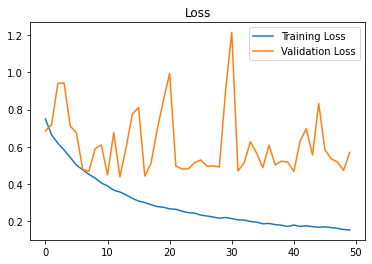

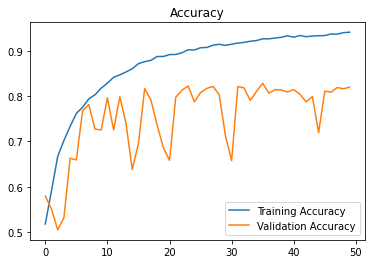

In [ ]:
history = model.history.history

train_loss = history['loss']
val_loss = history['val_loss']
train_acc = history['accuracy']
val_acc = history['val_accuracy']

# Loss
plt.figure()
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Accuracy
plt.figure()
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

Test accuracy:

In [ ]:
preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
preds = [1 if x > 0.5 else 0 for x in preds]
accuracy_score(preds, Y_test.reshape((Y_test.shape[0], 1)))

0.8204

# GRU

In [ ]:

gru_model = tf.keras.Sequential()

gru_model.add(
  tf.keras.layers.Embedding(
    input_dim= vocab_size, #len(text_tokenizer.word_index)+1,#vocab_size, 
    output_dim=embedding_dim, 
    input_length=X.shape[1],
    trainable=False,
    weights= [emb] #[embedding_matrix]
  )
)

gru_model.add(tf.keras.layers.Conv1D(units, 10, activation='relu'))

gru_model.add(tf.keras.layers.BatchNormalization())

gru_model.add(tf.keras.layers.Dropout(0.5))

gru_model.add(
  tf.keras.layers.Bidirectional(
  tf.keras.layers.GRU(units, return_sequences=True),
  input_shape=(X.shape[1], embedding_dim)
  )
)

gru_model.add(tf.keras.layers.BatchNormalization())

gru_model.add(tf.keras.layers.Dropout(0.5))

gru_model.add(tf.keras.layers.GRU(64))

gru_model.add(tf.keras.layers.BatchNormalization())

gru_model.add(tf.keras.layers.Dropout(0.5))

gru_model.add(
  # tf.keras.layers.TimeDistributed(
      tf.keras.layers.Dense(1, activation='sigmoid')
  # )
)

gru_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 235, 300)          9000300   
                                                                 
 conv1d_3 (Conv1D)           (None, 226, 128)          384128    
                                                                 
 batch_normalization_9 (Batc  (None, 226, 128)         512       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 226, 128)          0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 226, 256)         198144    
 nal)                                                            
                                                                 
 batch_normalization_10 (Bat  (None, 226, 256)        

In [ ]:
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
checkpoints.filepath =  "/content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/GRU_MODEL_1"

In [ ]:
gru_model.fit(X_train, Y_train, epochs=50, validation_data=(X_val, Y_val), callbacks=[checkpoints])

Epoch 1/50
1266/1266 [==============================] - ETA: 0s - loss: 0.7417 - accuracy: 0.5310

INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/assets


1266/1266 [==============================] - 225s 165ms/step - loss: 0.7417 - accuracy: 0.5310 - val_loss: 0.6350 - val_accuracy: 0.6449
Epoch 2/50
1266/1266 [==============================] - ETA: 0s - loss: 0.5937 - accuracy: 0.6919

INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/assets


1266/1266 [==============================] - 211s 167ms/step - loss: 0.5937 - accuracy: 0.6919 - val_loss: 0.5936 - val_accuracy: 0.6964
Epoch 3/50
1266/1266 [==============================] - 201s 159ms/step - loss: 0.5287 - accuracy: 0.7384 - val_loss: 0.8645 - val_accuracy: 0.5716
Epoch 4/50
1266/1266 [==============================] - ETA: 0s - loss: 0.4806 - accuracy: 0.7740

INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/assets


1266/1266 [==============================] - 192s 152ms/step - loss: 0.4806 - accuracy: 0.7740 - val_loss: 0.5551 - val_accuracy: 0.7200
Epoch 5/50
1266/1266 [==============================] - 195s 154ms/step - loss: 0.4416 - accuracy: 0.7950 - val_loss: 0.6361 - val_accuracy: 0.7053
Epoch 6/50
1266/1266 [==============================] - ETA: 0s - loss: 0.4112 - accuracy: 0.8162

INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/assets


1266/1266 [==============================] - 190s 150ms/step - loss: 0.4112 - accuracy: 0.8162 - val_loss: 0.4390 - val_accuracy: 0.8004
Epoch 7/50
1266/1266 [==============================] - 189s 149ms/step - loss: 0.3837 - accuracy: 0.8296 - val_loss: 0.6904 - val_accuracy: 0.7062
Epoch 8/50
1266/1266 [==============================] - ETA: 0s - loss: 0.3628 - accuracy: 0.8418

INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/assets


1266/1266 [==============================] - 185s 146ms/step - loss: 0.3628 - accuracy: 0.8418 - val_loss: 0.4286 - val_accuracy: 0.8018
Epoch 9/50
1266/1266 [==============================] - 173s 137ms/step - loss: 0.3390 - accuracy: 0.8554 - val_loss: 0.5950 - val_accuracy: 0.7231
Epoch 10/50
1266/1266 [==============================] - ETA: 0s - loss: 0.3216 - accuracy: 0.8627

INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/assets


1266/1266 [==============================] - 178s 141ms/step - loss: 0.3216 - accuracy: 0.8627 - val_loss: 0.4164 - val_accuracy: 0.8233
Epoch 11/50
1266/1266 [==============================] - 189s 150ms/step - loss: 0.3051 - accuracy: 0.8711 - val_loss: 0.4940 - val_accuracy: 0.7838
Epoch 12/50
1266/1266 [==============================] - 161s 127ms/step - loss: 0.2909 - accuracy: 0.8799 - val_loss: 0.7063 - val_accuracy: 0.7093
Epoch 13/50
1266/1266 [==============================] - 161s 127ms/step - loss: 0.2754 - accuracy: 0.8855 - val_loss: 0.6360 - val_accuracy: 0.7247
Epoch 14/50
1266/1266 [==============================] - 160s 126ms/step - loss: 0.2667 - accuracy: 0.8898 - val_loss: 0.4374 - val_accuracy: 0.8211
Epoch 15/50
1266/1266 [==============================] - 161s 128ms/step - loss: 0.2505 - accuracy: 0.8961 - val_loss: 0.4615 - val_accuracy: 0.8142
Epoch 16/50
1266/1266 [==============================] - 161s 128ms/step - loss: 0.2421 - accuracy: 0.9012 - val_loss:

INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/assets


1266/1266 [==============================] - 182s 143ms/step - loss: 0.1795 - accuracy: 0.9284 - val_loss: 0.4158 - val_accuracy: 0.8347
Epoch 25/50
1266/1266 [==============================] - 177s 140ms/step - loss: 0.1778 - accuracy: 0.9303 - val_loss: 0.8785 - val_accuracy: 0.7364
Epoch 26/50
1266/1266 [==============================] - 159s 126ms/step - loss: 0.1766 - accuracy: 0.9296 - val_loss: 0.9657 - val_accuracy: 0.7258
Epoch 27/50
1266/1266 [==============================] - 160s 126ms/step - loss: 0.1713 - accuracy: 0.9317 - val_loss: 0.4730 - val_accuracy: 0.8176
Epoch 28/50
1266/1266 [==============================] - 159s 125ms/step - loss: 0.1644 - accuracy: 0.9357 - val_loss: 0.5394 - val_accuracy: 0.8193
Epoch 29/50
1266/1266 [==============================] - 159s 125ms/step - loss: 0.1596 - accuracy: 0.9368 - val_loss: 0.4692 - val_accuracy: 0.8218
Epoch 30/50
1266/1266 [==============================] - 158s 125ms/step - loss: 0.1572 - accuracy: 0.9380 - val_loss:

INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/University of Oklahoma/Fall 2021/ECE 5583-980 Information Theory and Probabilistic Programming/Project/Model Checkpoints/assets


1266/1266 [==============================] - 180s 142ms/step - loss: 0.1081 - accuracy: 0.9593 - val_loss: 0.5140 - val_accuracy: 0.8349


In [ ]:
gru_model.fit(X_train, Y_train, epochs=5, validation_data=(X_val, Y_val), callbacks=[checkpoints])

Epoch 1/5
1266/1266 [==============================] - 194s 154ms/step - loss: 0.1044 - accuracy: 0.9610 - val_loss: 0.7038 - val_accuracy: 0.8144
Epoch 2/5
1266/1266 [==============================] - 173s 137ms/step - loss: 0.1062 - accuracy: 0.9607 - val_loss: 0.5869 - val_accuracy: 0.8222
Epoch 3/5
1266/1266 [==============================] - 160s 126ms/step - loss: 0.1049 - accuracy: 0.9603 - val_loss: 0.6895 - val_accuracy: 0.7976
Epoch 4/5
1266/1266 [==============================] - 160s 126ms/step - loss: 0.0980 - accuracy: 0.9632 - val_loss: 0.6085 - val_accuracy: 0.8307
Epoch 5/5
1266/1266 [==============================] - 160s 126ms/step - loss: 0.1007 - accuracy: 0.9627 - val_loss: 0.9254 - val_accuracy: 0.7698


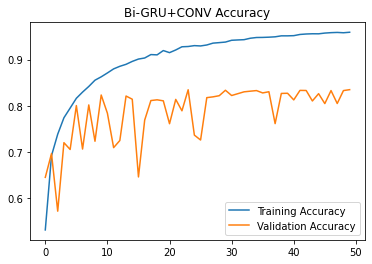

In [ ]:
plt.figure()
plt.plot(gru_model.history.hisotry['accuracy'], label='Training Accuracy')
plt.plot(gru_model.history.hisotry['val_accuracy'], label='Validation Accuracy')
plt.title('Bi-GRU+CONV Accuracy')
plt.legend()
plt.show()

Test accuracy:

In [ ]:
preds = gru_model.predict(X_test)

In [ ]:
preds = [1 if x > 0.5 else 0 for x in preds]

In [ ]:
accuracy_score(preds, Y_test.reshape((Y_test.shape[0], 1)))

0.8376

#Thank you!